In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.warn('my warning')

In [2]:
db_data=pd.read_csv('diabetes_data.csv')
db_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data preprocessing 
        is a technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues.

In [3]:
db_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###### Data Correlation matrix

In [4]:
corr = db_data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


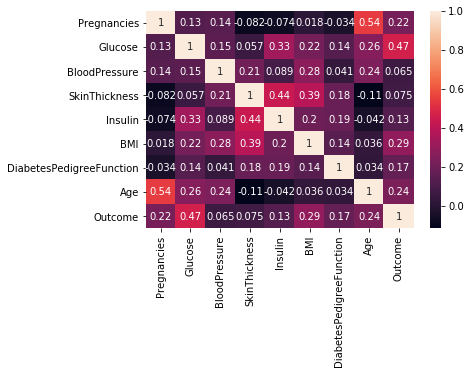

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr, annot = True)

In [6]:
# Check for the Null column values in the dataset
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
db_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Data cleaning and transformation

In [8]:
# Calculate the median value for BMI
median_bmi = db_data['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
db_data['BMI'] = db_data['BMI'].replace(to_replace=0, value=median_bmi)

In [9]:
# Calculate the median value for BloodP
median_bloodp = db_data['BloodPressure'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
db_data['BloodPressure'] = db_data['BloodPressure'].replace(to_replace=0, value=median_bloodp)

In [10]:
# Calculate the median value for PlGlcConc
median_plglcconc = db_data['Glucose'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
db_data['Glucose'] = db_data['Glucose'].replace(to_replace=0, value=median_plglcconc)

In [11]:
# Calculate the median value for SkinThick
median_skinthick = db_data['SkinThickness'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
db_data['SkinThickness'] = db_data['SkinThickness'].replace(to_replace=0, value=median_skinthick)

In [12]:
# Calculate the median value for TwoHourSerIns
median_twohourserins = db_data['Insulin'].median()
# Substitute it in the TwoHourSerIns column of the
# dataset where values are 0
db_data['Insulin'] = db_data['Insulin'].replace(to_replace=0, value=median_twohourserins)

### Feature Scaling

        One of the most important data transformations we need to apply is the features scaling. Basically most of the machine learning algorithms don't work very well if the features have a different set of values. In our case for example the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason we need to apply a proper transformation.

In [13]:
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(db_data)
db_data_scaled = scaler.transform(db_data)

#scaler.fit(train_set)
#train_set_scaled = scaler.transform(train_set)
#test_set_scaled = scaler.transform(test_set)

In [14]:
df = pd.DataFrame(data=db_data_scaled)
df.head()

,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [15]:
from sklearn.model_selection import train_test_split
X=db_data.drop(['Outcome'],axis=1)
y=db_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_text=sc.transform(X_test)

### Visualise the Dataset

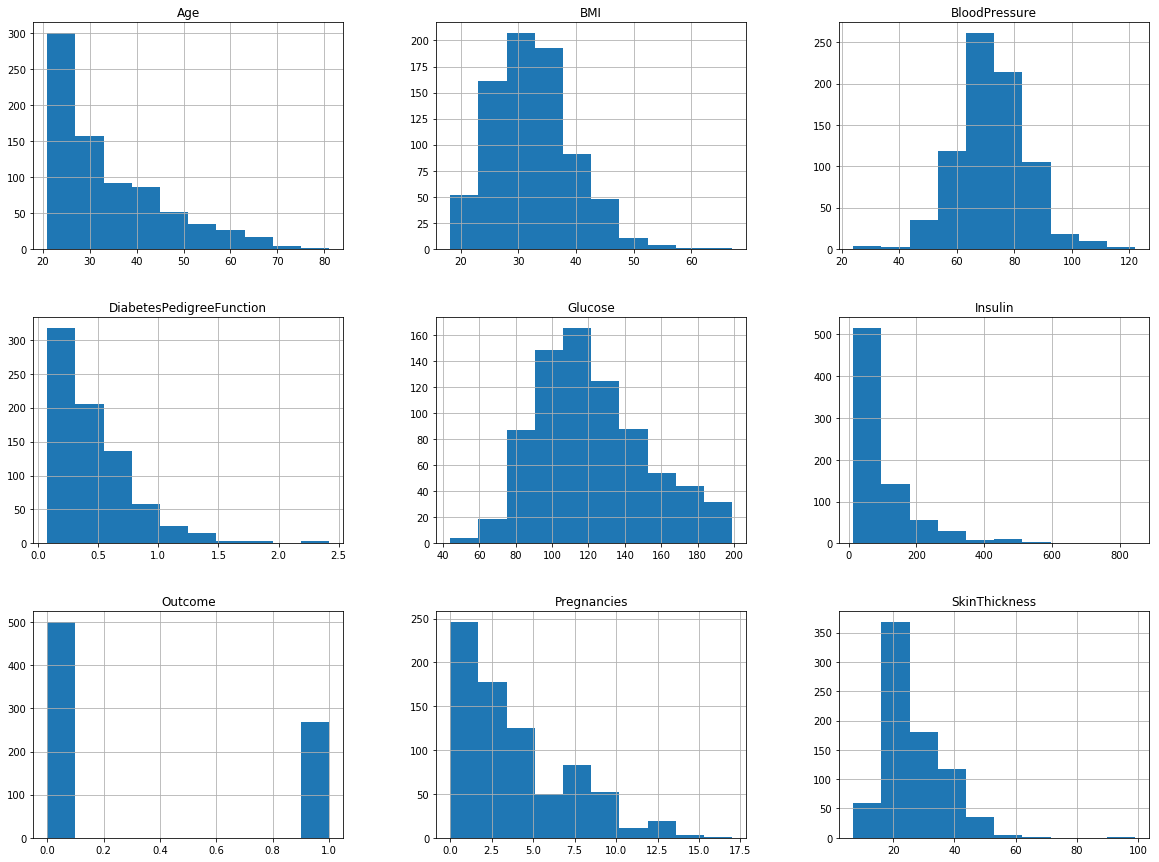

In [17]:
db_data.hist(bins=10, figsize=(20, 15))
plt.show()

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

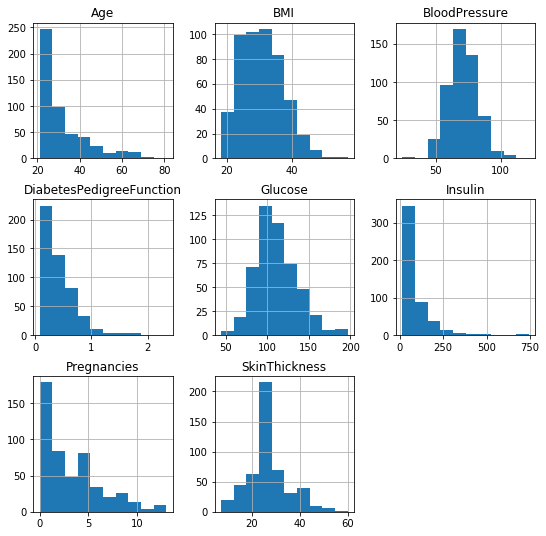

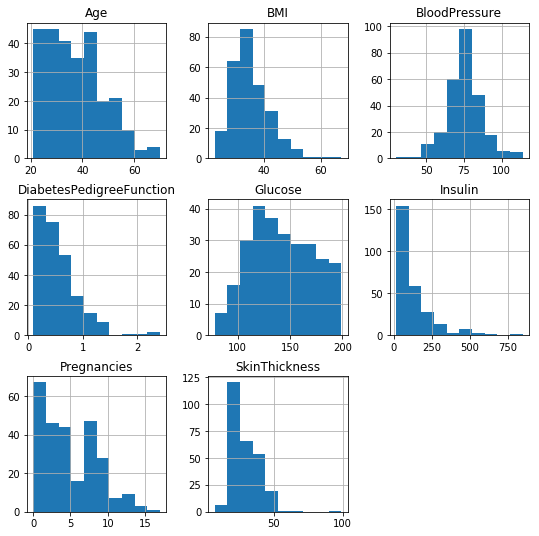

In [18]:
db_data.groupby('Outcome').hist(figsize=(9, 9))

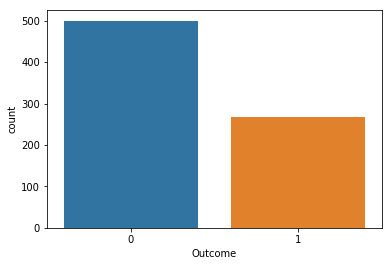

In [19]:
# check for the positive and negative labels.
sns.countplot(x="Outcome",data=db_data)